<a href="https://colab.research.google.com/github/sumiranbhatnagar/Object-detection/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opencv-python



In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
image= cv2.imread("/content/cat.jpg")

In [4]:
type(image)

NoneType

In [7]:
image.shape

(800, 1200, 3)

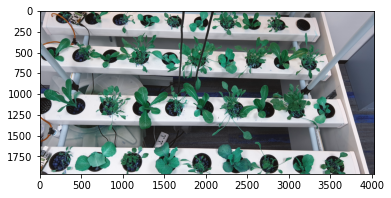

In [ ]:
plt.imshow(image)

In [ ]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )

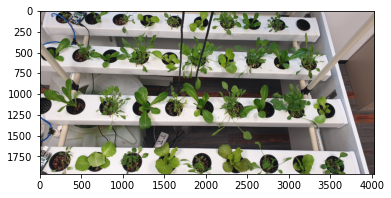

In [ ]:
plt.imshow(new_image)

Split Image Channels

In [ ]:
r,g,b= cv2.split(new_image)

In [ ]:
print('r',r)
print('g',g)
print('b',b)

r [[127 126 127 ... 179 178 172]
 [125 123 125 ... 176 175 173]
 [125 123 123 ... 175 172 173]
 ...
 [117 101  98 ...  58  58  59]
 [108 103 118 ...  58  58  61]
 [111 101 118 ...  59  60  62]]
g [[120 119 120 ... 167 166 160]
 [118 116 118 ... 164 163 161]
 [118 116 116 ... 163 160 161]
 ...
 [117 102  99 ...  49  49  50]
 [108 104 119 ...  49  49  52]
 [111 103 119 ...  50  51  53]]
b [[114 113 114 ... 167 166 160]
 [112 110 112 ... 164 163 161]
 [112 110 110 ... 163 160 161]
 ...
 [ 83  68  67 ...  52  52  53]
 [ 72  70  85 ...  52  52  55]
 [ 75  66  85 ...  53  54  56]]


In [ ]:
print('r(shape)',r.shape)
print('g(shape)',g.shape)
print('b(shape)',b.shape)

r(shape) (1960, 4032)
g(shape) (1960, 4032)
b(shape) (1960, 4032)


Marge Image Channels

In [ ]:
new_image = cv2.merge((r,g,b))

Resize


In [ ]:
s=10 #scale
w=int(new_image.shape[1]*s/100) #width
h = int(new_image.shape[0]*s/100) #height
dim = (w,h)
re_size =cv2.resize(new_image, dim, interpolation = cv2.INTER_AREA)
re_size.shape

(196, 403, 3)

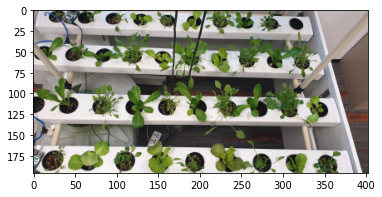

In [ ]:
plt.imshow(re_size)

In [8]:
! pip install utils

In [9]:
! pip install darknet

In [11]:
yolo = cv2.dnn.readNet('/content/yolov3-tiny.weights', '/content/tiny-yolov3.cfg')

In [12]:
classes =[]
with open ("/content/coco.names",'r') as f:
  classes = f.read().splitlines()

In [13]:
len(classes)

80

In [14]:
img = cv2.imread('/content/trucks.jpg')

blob = cv2.dnn.blobFromImage(img, 1/255,(320,320),(0,0,0), swapRB =True, crop = False)

In [15]:
blob.shape

(1, 3, 320, 320)

In [16]:
s=10 #scale
width=int(img.shape[1]*s/100) #width
height = int(img.shape[0]*s/100) #height
#dieightm = (w,h)

In [17]:
yolo.setInput(blob)

In [19]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

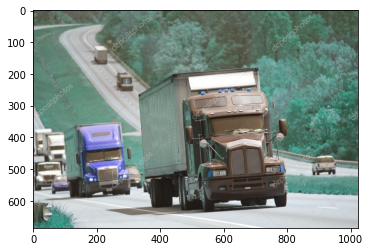

In [20]:
plt.imshow(img)

In [ ]:
#width = 196
#height = 403

**Read** the Image and Find The Bounding boxes


In [22]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    #print(score)
    class_id = np.argmax(score)
    #print(class_id)
    confidence = score[class_id] 
    #print(confidence)
    if confidence > 0.2 :

       center_x = int(detection[0]*width )
       center_y = int(detection[0]*height )
       w = int(detection[0]*width )
       h = int(detection[0]*height )
       x = int(center_x - w/2)
       y = int(center_y - h/2)
       boxes.append([x,y,w,h])
       confidences.append(float(confidence))
       class_ids.append(class_id)

In [23]:
len(boxes)

5

In [24]:
indexes= cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)

In [25]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size=(len (boxes),3))

In [29]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  print(label)
  confi = str(round(confidences[i],2))
  color = colors[i]
  cv2.rectangle(img,(x,y),(x+w, y+h), color, 3)
  cv2.putText(img,  label+" "+confi, (x,y+20), font, 2, (255,255,255),1)

truck
truck
car


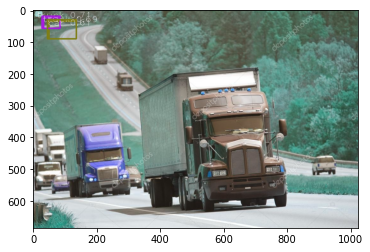

In [30]:
plt.imshow(img)